<a href="https://colab.research.google.com/github/deepacu1986/DATA-SCIENCE-ASSIGNMENTS/blob/main/pca_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA
Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.
Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.
Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.
Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.
Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.
Task 6: Conclusion and Insights

1.	Summarize the key findings and insights from the assignment.
2.	Discuss the practical implications of using PCA and clustering in data analysis.
3.	Provide recommendations for when to use each technique based on the analysis conducted.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/wine[1].csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.shape

(178, 14)

In [ ]:
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.Type.unique()

array([1, 2, 3])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


<Figure size 1500x1500 with 0 Axes>

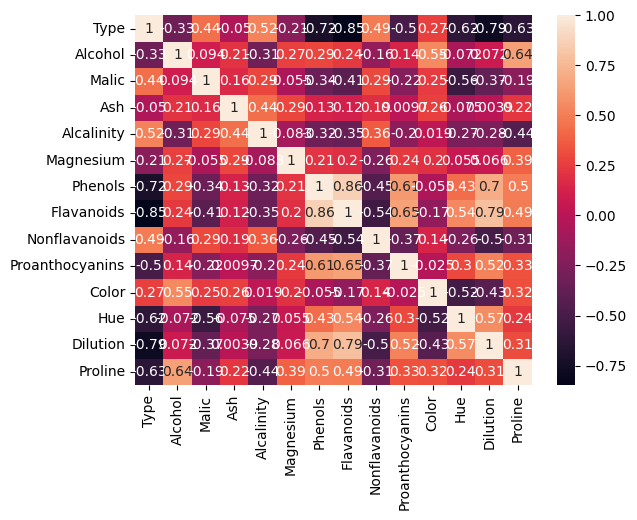

<Figure size 1500x1500 with 0 Axes>

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(15,15))

In [ ]:
target=df['Type']
features=df.drop(columns=['Type','Ash','Color'],axis=1)
features.columns

Index(['Alcohol', 'Malic', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids',
       'Nonflavanoids', 'Proanthocyanins', 'Hue', 'Dilution', 'Proline'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsca=StandardScaler()
features=stdsca.fit_transform(features)

In [ ]:
features=pd.DataFrame(features,columns=df.drop(columns=['Type','Ash','Color'],axis=1).columns)
features.head()

,Alcohol,Malic,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Hue,Dilution,Proline
0,1.518613,-0.562250,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,0.406051,1.113449,0.965242
2,0.196879,0.021231,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.318304,0.788587,1.395148
3,1.691550,-0.346811,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,-0.427544,1.184071,2.334574
4,0.295700,0.227694,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,0.362177,0.449601,-0.037874


In [ ]:
''' #PCA
pca = PCA()
X_pca = pca.fit_transform(features)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()'''

' #PCA\npca = PCA()\nX_pca = pca.fit_transform(features)\n\n# Scree plot\nplt.figure(figsize=(8, 5))\nplt.plot(np.cumsum(pca.explained_variance_ratio_), marker=\'o\')\nplt.xlabel("Number of Components")\nplt.ylabel("Cumulative Explained Variance")\nplt.title("Explained Variance by PCA Components")\nplt.grid(True)\nplt.show()'

In [ ]:
# Select number of components (e.g., 95% variance)
pca =PCA(n_components=3)

print(f"Selected {pca_optimal} components.")

Selected PCA(n_components=3) components.


In [ ]:
pca.fit(features)


PCA(n_components=3)

In [ ]:
new_features = pca.transform(features)

In [ ]:
new_features.shape

(178, 3)

In [ ]:
pca.explained_variance_ratio_

array([0.42536364, 0.15713577, 0.09516095])

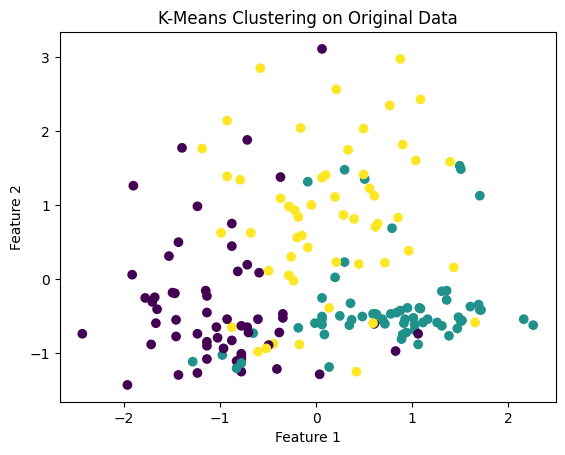

Silhouette Score: 0.286, Davies-Bouldin Index: 1.365


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# K-Means on original data
kmeans_orig = KMeans(n_clusters=3)
labels_orig = kmeans_orig.fit_predict(features)

# Plot (use first two features for visualization)
plt.scatter(features.iloc[:, 0],features.iloc[:, 1],c=labels_orig, cmap='viridis')
plt.title("K-Means Clustering on Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluation metrics
sil_orig = silhouette_score(features, labels_orig)
db_orig = davies_bouldin_score(features, labels_orig)
print(f"Silhouette Score: {sil_orig:.3f}, Davies-Bouldin Index: {db_orig:.3f}")


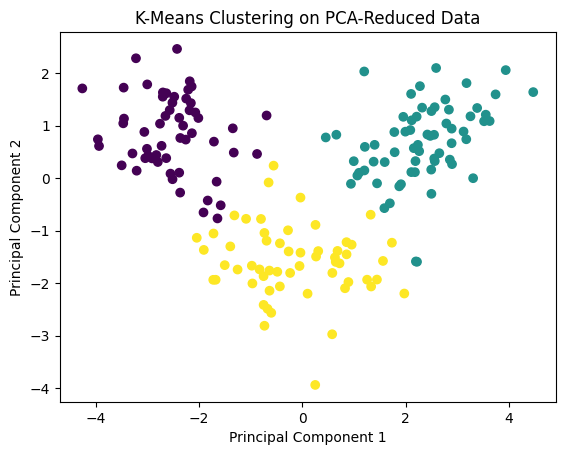

Silhouette Score (PCA): 0.554, Davies-Bouldin Index (PCA): 0.602


In [ ]:
# K-Means on PCA data
kmeans_pca = KMeans(n_clusters=3)
labels_pca = kmeans_pca.fit_predict(new_features)

# Plot first 2 principal components
plt.scatter(new_features[:, 0], new_features[:, 1], c=labels_pca, cmap='viridis')
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Evaluation metrics
sil_pca = silhouette_score(X_pca_optimal, labels_pca)
db_pca = davies_bouldin_score(X_pca_optimal, labels_pca)
print(f"Silhouette Score (PCA): {sil_pca:.3f}, Davies-Bouldin Index (PCA): {db_pca:.3f}")
